In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [48]:
df = pd.read_csv('./Data/bmi_500.csv')

In [49]:
#모분산 
np.var(df['Height'])

267.6128640000003

In [50]:
# 표본 5개를 랜덤 추출하고 각 분산을 v에 저장. 이를 100번 반복후 평균 (표본 분산)
v = []

for i in range(100):
    v.append(np.var(random.sample(list(df['Height']),5)))
np.mean(v)

np.float64(198.2128)

(array([ 1.,  4., 15., 16., 23., 21.,  7.,  7.,  3.,  3.]),
 array([184.8872 , 190.92776, 196.96832, 203.00888, 209.04944, 215.09   ,
        221.13056, 227.17112, 233.21168, 239.25224, 245.2928 ]),
 <BarContainer object of 10 artists>)

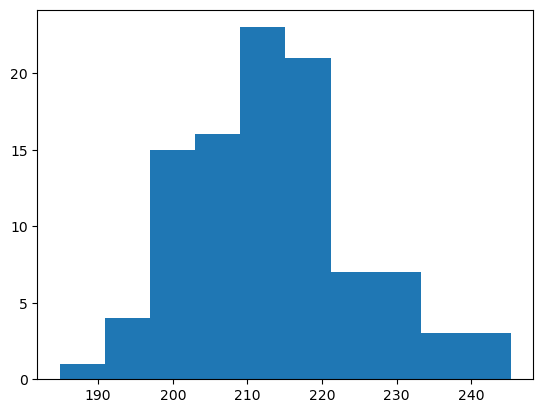

In [51]:
# 일반화를 위해 이를 100번 반복 (표본 분산의 기대값)

variance = []

for i in range(100):
    v = []
    for w in range(100):
        v.append(np.var(random.sample(list(df['Height']),5)))
    
    variance.append(np.mean(v))

#추출한 표본 분산의 분포 (중심극한정리를 통해 표본의 분산은 정규분포를 따름)
plt.hist(variance)

(array([ 3.,  8., 17., 21., 16., 19., 11.,  4.,  0.,  1.]),
 array([236.694 , 244.0778, 251.4616, 258.8454, 266.2292, 273.613 ,
        280.9968, 288.3806, 295.7644, 303.1482, 310.532 ]),
 <BarContainer object of 10 artists>)

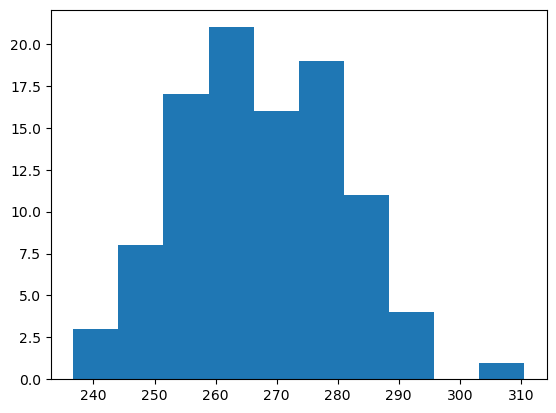

In [52]:
variance = []

for i in range(100):
    v = []
    for w in range(100):
        v.append(np.var(random.sample(list(df['Height']),5), ddof = 1)) #베셀보정
    
    variance.append(np.mean(v))

plt.hist(variance)

In [54]:
#공분산

np.cov(df['Height'], df['Weight']) # 자기 자신의 공분산은 분산과 같음 해당 분산은 보정이 들어간 분산

array([[2.68149162e+02, 2.36472946e-01],
       [2.36472946e-01, 1.04863327e+03]])

In [57]:
#상관계수
df['Height'].corr(df['Weight'])

np.float64(0.00044594512830533044)

In [58]:
import statsmodels.api as sm

In [60]:
x = sm.add_constant(df['Height'])
sm.OLS(df['Weight'],x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.992
Time:                        12:05:23   Log-Likelihood:                -2447.8
No. Observations:                 500   AIC:                             4900.
Df Residuals:                     498   BIC:                             4908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.8501     15.129      6.996      0.000      76.125     135.575
Height         0.0009      0.089      0.010      0.992      -0.173       0.175
==============================================================================
Omnibus:                      310.450   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.981
Skew:                          -0.038   Prob(JB):                     3.09e-07
Kurtosis:                       1.803   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
x = df['Height']
x = sm.add_constant(x)
y = df['Weight']

model = sm.OLS(y,x)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 9.904e-05
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.992
Time:                        12:11:58   Log-Likelihood:                -2447.8
No. Observations:                 500   AIC:                             4900.
Df Residuals:                     498   BIC:                             4908.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.8501     15.129      6.996      0.000      76.125     135.575
Height         0.0009      0.089      0.010      0.992      -0.173       0.175
==============================================================================
Omnibus:                      310.450   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.981
Skew:                          -0.038   Prob(JB):                     3.09e-07
Kurtosis:                       1.803   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""